İRİS VERİ SETİ İLE KARAR AĞAÇLARI SINIFLANDIRMA

In [200]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [202]:
iris = load_iris()

In [204]:
# 
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [206]:
#DsicionTree model oluştyr ve train et
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth= 5, random_state = 42)

In [208]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [210]:
#DT- evaluation test
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("İris veri seti ile eğitilen DesicionTree model doğruluğu -> ", accuracy)

İris veri seti ile eğitilen DesicionTree model doğruluğu ->  1.0


In [212]:
#Confison matrix  ile sonuca bakma
confusion = confusion_matrix(y_test, y_pred)
print("Consusion Matrix :  \n", confusion)

Consusion Matrix :  
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


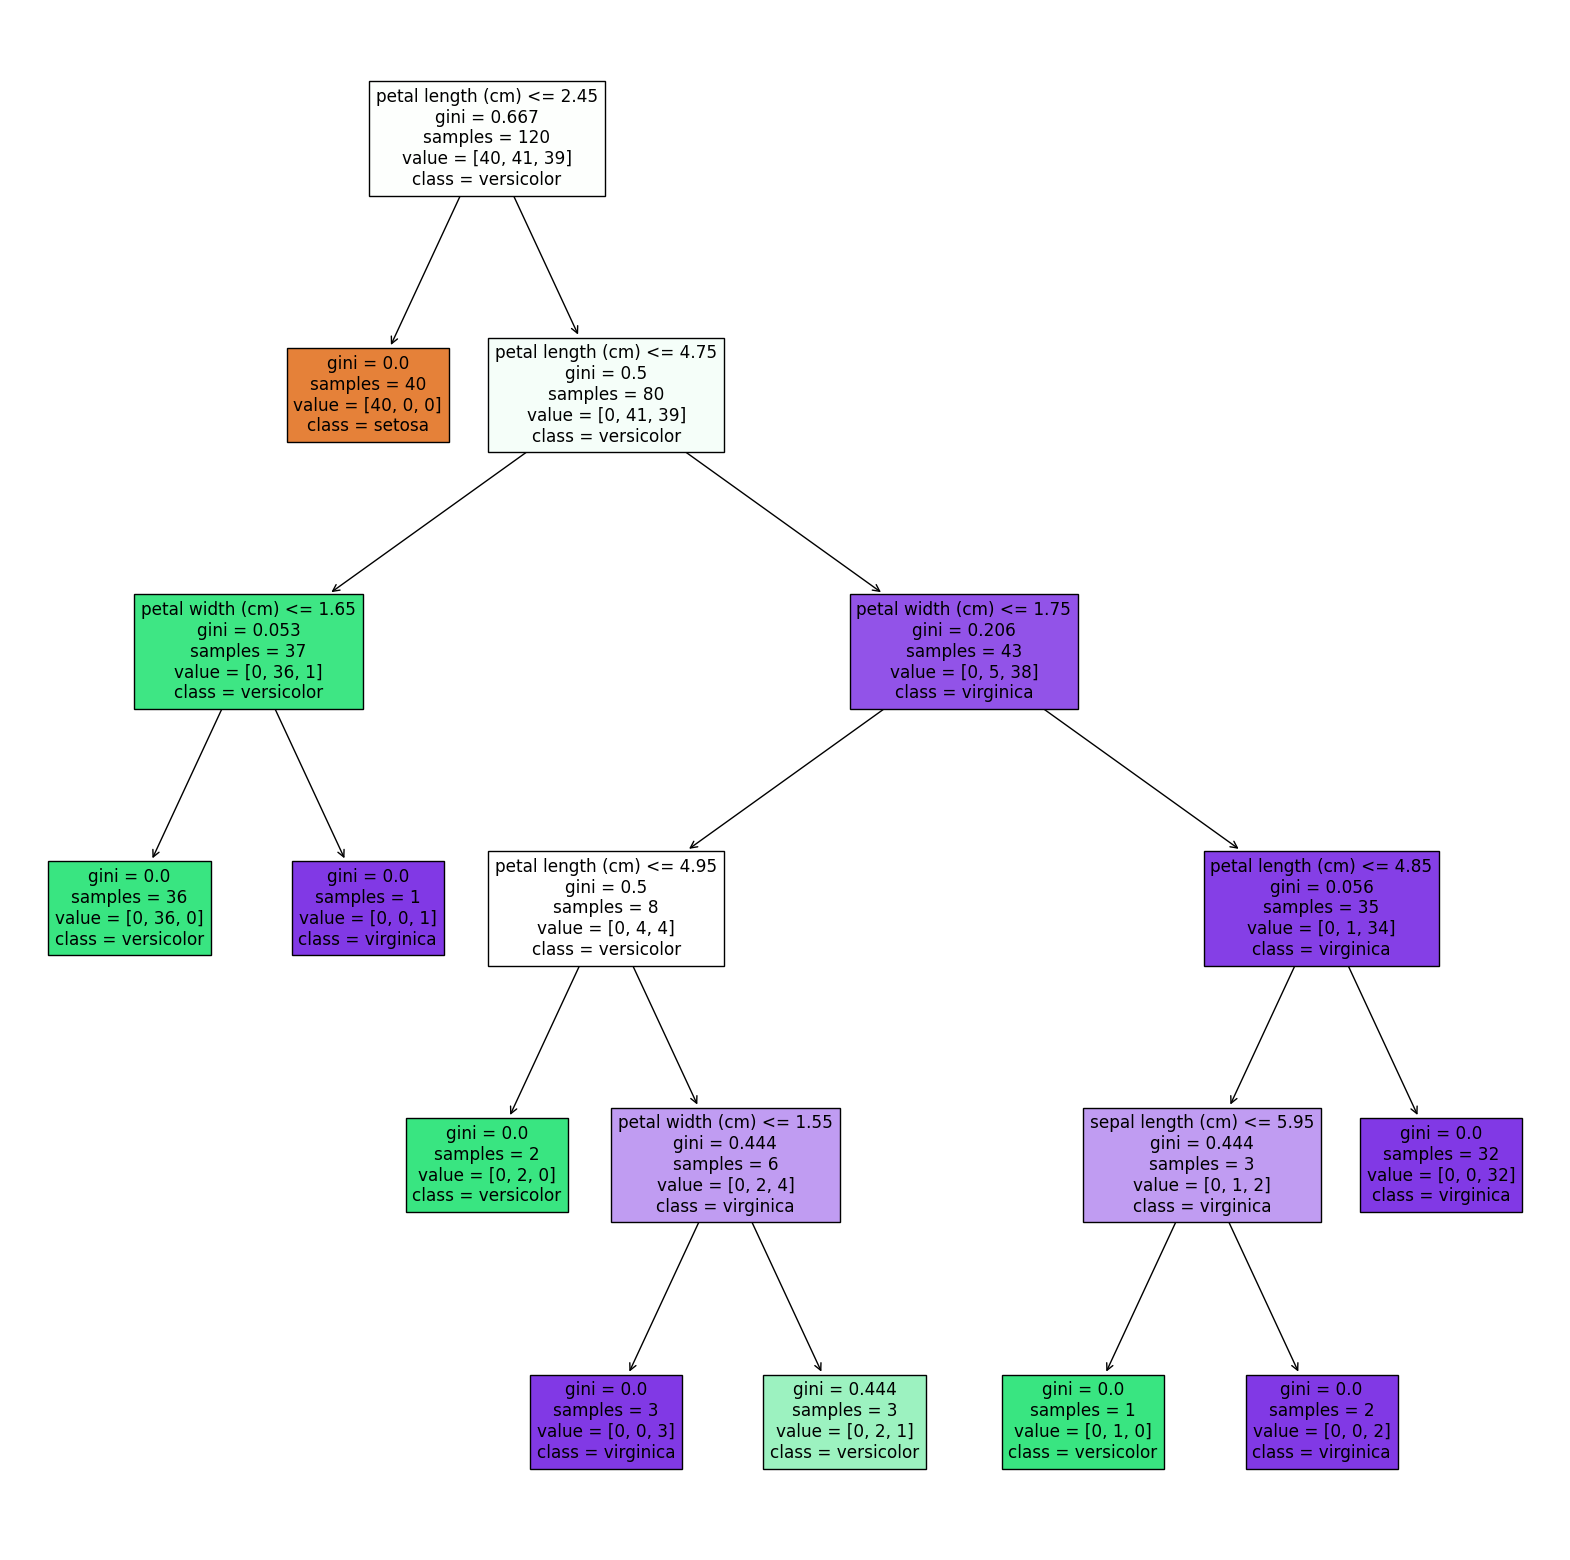

In [214]:
plt.figure(figsize=(20,20))
plot_tree(tree_clf, filled=True, feature_names= iris.feature_names, class_names=list(iris.target_names))
plt.show()

In [215]:
feature_importance = tree_clf.feature_importances_
feature_names = iris.feature_names

feature_importance_sorted = sorted(list(zip(feature_names, feature_importance)), reverse= True)
feature_importance_sorted

[('sepal width (cm)', 0.0),
 ('sepal length (cm)', 0.016952744225471498),
 ('petal width (cm)', 0.07849499604256478),
 ('petal length (cm)', 0.9045522597319637)]

In [218]:
# İris veri seti ile ikili paper ile feature selection yapacağız.

In [220]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

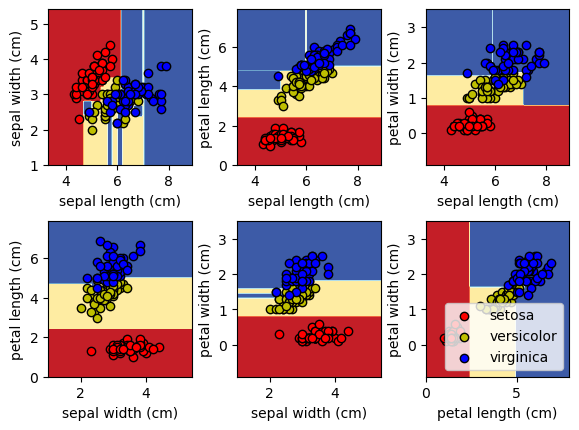

In [222]:
n_classes = 3
plot_colors = "ryb"

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    clf = DecisionTreeClassifier().fit(X, y)
    ax = plt.subplot(2,3, pairidx +1)
    plt.tight_layout(h_pad = 0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=plt.cm.RdYlBu, response_method="predict", ax=ax, xlabel= iris.feature_names[pair[0]], ylabel = iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i], cmap = plt.cm.RdYlBu,edgecolors="black")

plt.legend()